## Feed forward neural net

#### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

#### Loading and preprocessing dataset for neural net

In [2]:
train_df = pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\Predictive model for Social media\train.csv", error_bad_lines=False)
test_df = pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\Predictive model for Social media\test.csv", error_bad_lines=False)
val_df = pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\Predictive model for Social media\val.csv", error_bad_lines=False)

C:\Users\Ksnes\AppData\Local\Temp\ipykernel_20436\322027118.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_df = pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\Predictive model for Social media\train.csv", error_bad_lines=False)
C:\Users\Ksnes\AppData\Local\Temp\ipykernel_20436\322027118.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test_df = pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\Predictive model for Social media\test.csv", error_bad_lines=False)
C:\Users\Ksnes\AppData\Local\Temp\ipykernel_20436\322027118.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  val_df = pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\Predictive model for Social media\val.csv", error_bad_lines=False)


In [3]:
# Drop missing values
tr_df = train_df.dropna()
te_df = test_df.dropna()
va_df = val_df.dropna()

In [4]:
tr_df = pd.get_dummies(tr_df, columns=['Gender', 'Platform'])  # Using dummies to convert gender and platform column
va_df = pd.get_dummies(va_df, columns=['Gender', 'Platform'])
te_df = pd.get_dummies(te_df, columns=['Gender', 'Platform'])

In [5]:
missing_cols_test = set(tr_df.columns) - set(te_df.columns) #Ensuring colums match in all test, train, val dataframe
for col in missing_cols_test:
    te_df[col] = 0
te_df = te_df[tr_df.columns]

missing_cols_val = set(tr_df.columns) - set(va_df.columns)
for col in missing_cols_val:
    va_df[col] = 0
va_df = va_df[tr_df.columns]

In [6]:
print("Columns in training data:", tr_df.columns)
print("\nColumns in test data after encoding and alignment:", te_df.columns)
print("\nColumns in validation data after encoding and alignment:", va_df.columns)

Columns in training data: Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Gender_Female',
       'Gender_Male', 'Gender_Non-binary', 'Platform_Facebook',
       'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat',
       'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp'],
      dtype='object')

Columns in test data after encoding and alignment: Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Gender_Female',
       'Gender_Male', 'Gender_Non-binary', 'Platform_Facebook',
       'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat',
       'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp'],
      dtype='object')

Columns in validation data after encoding and alignment: Inde

In [7]:
# using label encoder for target variable
label_encoder = LabelEncoder()

# Combining all labels
all_labels = list(tr_df['Dominant_Emotion']) + list(te_df['Dominant_Emotion']) + list(va_df['Dominant_Emotion'])
label_encoder.fit(all_labels)

LabelEncoder()

In [8]:
y_train_encoded = label_encoder.transform(tr_df['Dominant_Emotion'])
y_test_encoded = label_encoder.transform(te_df['Dominant_Emotion'])
y_val_encoded = label_encoder.transform(va_df['Dominant_Emotion'])

In [9]:
# Defining feature and target
X_train = tr_df.drop('Dominant_Emotion', axis=1)
X_test = te_df.drop('Dominant_Emotion', axis=1)
X_val = va_df.drop('Dominant_Emotion', axis=1)

In [10]:
print("Feature names in train data:", X_train.columns.tolist())
print("Feature names in test data:", X_test.columns.tolist())
print("Feature names in validation data:", X_val.columns.tolist())

Feature names in train data: ['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_Female', 'Gender_Male', 'Gender_Non-binary', 'Platform_Facebook', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp']
Feature names in test data: ['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_Female', 'Gender_Male', 'Gender_Non-binary', 'Platform_Facebook', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp']
Feature names in validation data: ['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_Female', 'Gender_Male', 'Gender_Non-binary', 'Platform_Facebook

In [11]:
# Selecting numeric column for scaling
numeric_columns = X_train.select_dtypes(include=[np.number]).columns.tolist()

In [12]:
# Verifying the numeric columns
print("Numeric columns in the dataset:", numeric_columns)

Numeric columns in the dataset: ['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_Female', 'Gender_Male', 'Gender_Non-binary', 'Platform_Facebook', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp']


In [13]:
# Standardizing the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])
X_val_scaled = scaler.transform(X_val[numeric_columns])

In [14]:
# Verifying the scaling
print("Scaled feature sample (first 5 rows of the training data):")
print(X_train_scaled[:5])

Scaled feature sample (first 5 rows of the training data):
[[-1.73031962 -0.63898721  0.61935033 -0.1677445   0.1933992  -0.63652269
  -1.24059931  1.30487651 -0.75       -0.60816364 -0.4843221   1.73205081
  -0.36927447 -0.29488391 -0.29488391 -0.5        -0.29488391]
 [-1.72685552  0.63389568 -0.15322804  0.87739258 -0.75426447  1.06510631
   0.87405861 -0.76635604  1.33333333 -0.60816364 -0.4843221  -0.57735027
  -0.36927447 -0.29488391 -0.29488391  2.         -0.29488391]
 [-1.72339142 -1.40271694 -0.92580641 -0.69031304 -0.94379721 -1.20373236
  -0.30075135 -0.76635604 -0.75        1.64429429  2.0647416  -0.57735027
  -0.36927447 -0.29488391 -0.29488391 -0.5        -0.29488391]
 [-1.71992731  0.12474252  2.67955931  2.4450982   2.27825929  1.63231598
   3.22367852  1.30487651 -0.75       -0.60816364 -0.4843221   1.73205081
  -0.36927447 -0.29488391 -0.29488391 -0.5        -0.29488391]
 [-1.71646321  1.39762541 -1.3120956  -1.21288158 -1.32286268 -1.54405816
  -1.4755613  -0.766356

#### Model architecture

In [16]:
model = Sequential()

In [19]:
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(len(np.unique(all_labels)), activation='softmax'))

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=500, batch_size=32, validation_data=(X_val_scaled, y_val_encoded))

Epoch 1/500
32/32 [==============================] - 0s 13ms/step - loss: 0.7089 - accuracy: 0.7320 - val_loss: 1.7459 - val_accuracy: 0.6667
Epoch 2/500
32/32 [==============================] - 0s 10ms/step - loss: 0.6989 - accuracy: 0.7510 - val_loss: 1.8133 - val_accuracy: 0.6327
Epoch 3/500
32/32 [==============================] - 0s 9ms/step - loss: 0.7163 - accuracy: 0.7480 - val_loss: 1.8274 - val_accuracy: 0.6463
Epoch 4/500
32/32 [==============================] - 0s 10ms/step - loss: 0.7621 - accuracy: 0.7170 - val_loss: 1.8679 - val_accuracy: 0.6463
Epoch 5/500
32/32 [==============================] - 0s 10ms/step - loss: 0.7417 - accuracy: 0.7300 - val_loss: 1.8047 - val_accuracy: 0.6395
Epoch 6/500
32/32 [==============================] - 0s 10ms/step - loss: 0.7247 - accuracy: 0.7400 - val_loss: 1.7702 - val_accuracy: 0.6599
Epoch 7/500
32/32 [==============================] - 0s 9ms/step - loss: 0.7232 - accuracy: 0.7480 - val_loss: 1.8552 - val_accuracy: 0.6735
Epoch 8/

In [29]:
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

4/4 [==============================] - 0s 7ms/step - loss: 0.5034 - accuracy: 0.9029
Test Accuracy: 90.29%


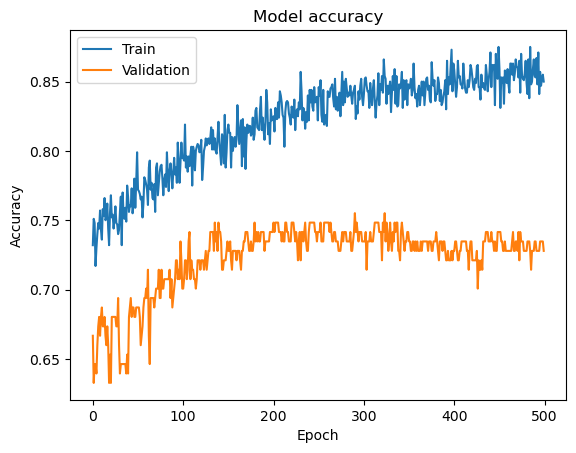

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
#The gap between the Train and Validation Shows potential overfitting 
#the training accuracy reaches around 90.29%, whereas validation accuracy stabilizes around 72.8%.
#This gap indicates that the model is performing significantly better on the training data compared to the unseen validation data.

In [32]:
# Recommendations are - Early stopping, adding reguralization, data augmentation, and cross validation to reduce the gap btw train and validation accuracy.